In [33]:
import pandas as pd

df = pd.read_csv('train.csv')

print(df.head())
print(df.info())
print(df.describe())
print(df.info())


          id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731

In [34]:
print(df.isnull().sum())
print(f"Duplicates: {df.duplicated().sum()}")

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64
Duplicates: 0


In [35]:
num_columns = [col for col in df.columns if df[col].dtype != 'object']
num_columns

['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'trip_duration']

In [36]:
df[num_columns]

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2,1,-73.982155,40.767937,-73.964630,40.765602,455
1,1,1,-73.980415,40.738564,-73.999481,40.731152,663
2,2,1,-73.979027,40.763939,-74.005333,40.710087,2124
3,2,1,-74.010040,40.719971,-74.012268,40.706718,429
4,2,1,-73.973053,40.793209,-73.972923,40.782520,435
...,...,...,...,...,...,...,...
1458639,2,4,-73.982201,40.745522,-73.994911,40.740170,778
1458640,1,1,-74.000946,40.747379,-73.970184,40.796547,655
1458641,2,1,-73.959129,40.768799,-74.004433,40.707371,764
1458642,1,1,-73.982079,40.749062,-73.974632,40.757107,373


<Axes: >

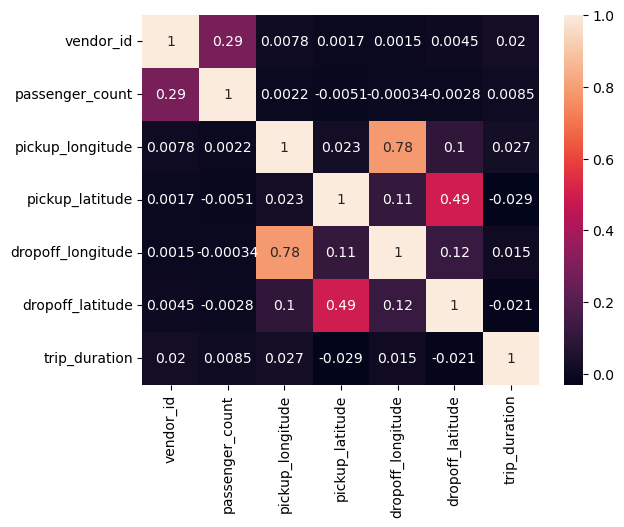

In [37]:
#collection of numerical columns
import seaborn as sns
sns.heatmap(df[num_columns].corr(), annot=True)

In [38]:
import numpy as np

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.dayofweek
df = df[(df['trip_duration'] > 60) & (df['trip_duration'] < 36000)]

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371 
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi/2.0)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

df['distance_km'] = haversine_distance(
    df['pickup_latitude'], df['pickup_longitude'],
    df['dropoff_latitude'], df['dropoff_longitude']
)

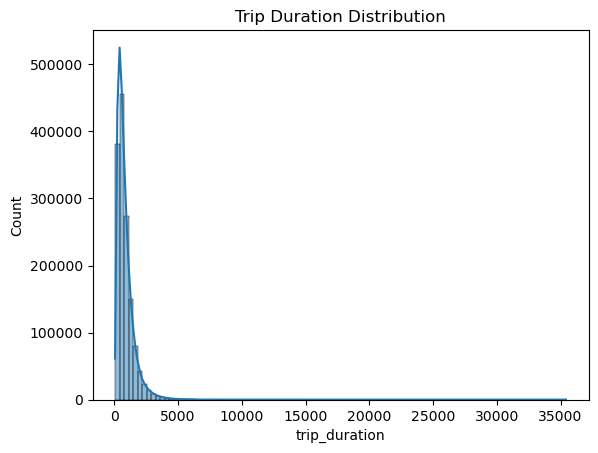

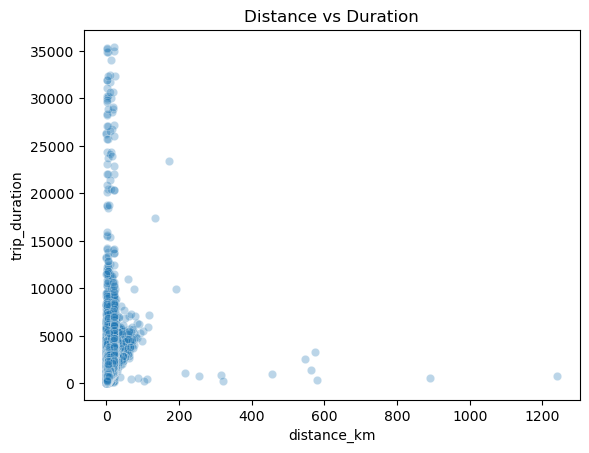

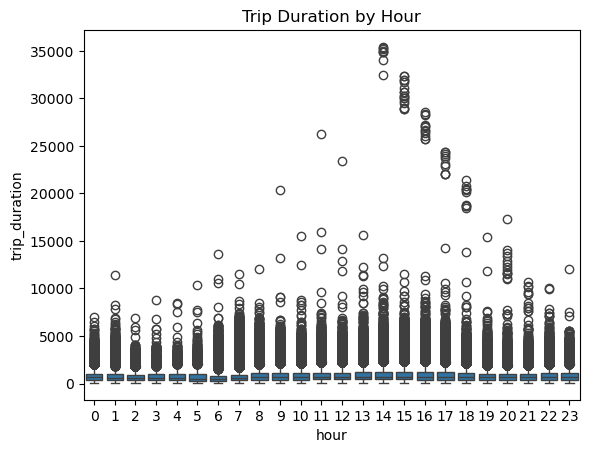

In [39]:
import matplotlib.pyplot as plt
import folium

sns.histplot(df['trip_duration'], bins=100, kde=True)
plt.title("Trip Duration Distribution")
plt.show()

sns.scatterplot(x='distance_km', y='trip_duration', data=df, alpha=0.3)
plt.title("Distance vs Duration")
plt.show()

sns.boxplot(x='hour', y='trip_duration', data=df)
plt.title("Trip Duration by Hour")
plt.show()

m = folium.Map(location=[32.1811408996582, 121.9333038330078], tiles='CartoDB Positron', zoom_start=12)
m

In [40]:
from sklearn.model_selection import train_test_split

features = ['passenger_count', 'vendor_id', 'hour', 'day', 'distance_km']
X = df[features]
y = df['trip_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=40,max_depth=10, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


RMSE: 413.16622989619464
R² Score: 0.6441087634374464


In [42]:
import joblib

joblib.dump(model, 'taxi_duration_model.pkl')


['taxi_duration_model.pkl']